In [1]:

!git clone https://github.com/miguel-fc/Neutron_Reflect.git

fatal: destination path 'Neutron_Reflect' already exists and is not an empty directory.


In [2]:
cd Neutron_Reflect/

/pscratch/sd/q/qubri000/Neutron_Reflect


In [3]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: pytorch-lightning 1.6.5 has a non-standard dependency specifier torch>=1.8.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install gdown

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: pytorch-lightning 1.6.5 has a non-standard dependency specifier torch>=1.8.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: pytorch-lightning 1.6.5 has a non-standard dependency specifier torch>=1.8.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: pytorch-lightning 1.6.5 has a non-standard dependency specifier torch>=1.8.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install -U --no-cache-dir gdown --pre

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: pytorch-lightning 1.6.5 has a non-standard dependency specifier torch>=1.8.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [8]:
#import packages

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import numpy as np
import data_preparation as dpre
import io
import os
# import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline
import seaborn as sea

In [10]:
#load in NR and SLD curves
curves_nr = np.load('../NR-SLD_CurvesPolySpecial.npy')
curves_SLD = np.load('../SLD_CurvesPolySpecial.npy')

curves_nr.shape, curves_SLD.shape


((100000, 2, 308), (100000, 2, 900))

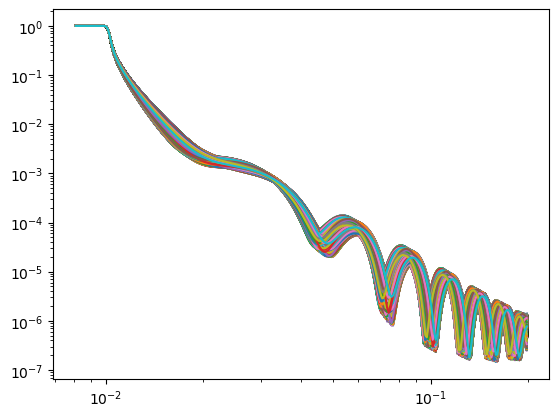

In [11]:
#plot NR curves
for x in range(curves_nr.shape[0]):
  plt.plot(curves_nr[x][0],curves_nr[x][1])
plt.xscale('log')
plt.yscale('log')

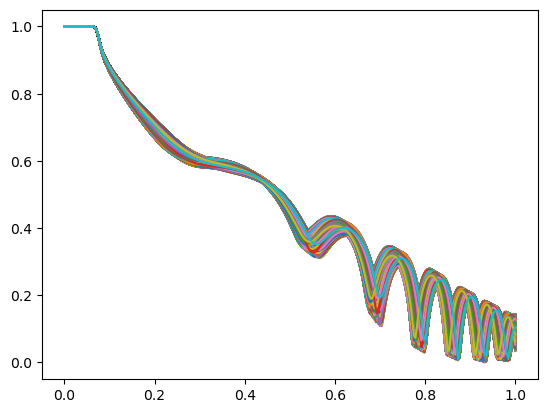

In [12]:
#normalize NR curves

curves_nr = np.log10(curves_nr)

x_points = []
y_points = []
for curve in curves_nr:
    x_points.append(curve[0])
    y_points.append(curve[1])
min_valXNR = float('inf')
min_valYNR = float('inf')
max_valXNR = -float('inf')
max_valYNR = -float('inf')
for i in range(len(y_points)):
    min_valXNR = min(min(x_points[i]), min_valXNR)
    min_valYNR = min(min(y_points[i]), min_valYNR)
    max_valXNR = max(max(x_points[i]), max_valXNR)
    max_valYNR = max(max(y_points[i]), max_valYNR)
for i in range(len(y_points)):
    for j in range(len(y_points[0])):
        x_points[i][j] -= min_valXNR
        y_points[i][j] -= min_valYNR
        x_points[i][j] /= (max_valXNR - min_valXNR)
        y_points[i][j] /= (max_valYNR - min_valYNR)
curves_nr2 = []
for i in range(len(y_points)):
    curves_nr2.append([x_points[i],y_points[i]])
curves_nr2 = np.stack(curves_nr2)
curves_nr2.shape
for x in range(curves_nr.shape[0]):
  plt.plot(curves_nr[x][0],curves_nr[x][1])

[[0.00000000e+00 2.97552836e-01 5.95105673e-01 ... 2.66904894e+02
  2.67202447e+02 2.67500000e+02]
 [2.07000000e+00 2.07000000e+00 2.07000000e+00 ... 3.28437249e-03
  2.69251283e-03 2.19942792e-03]]


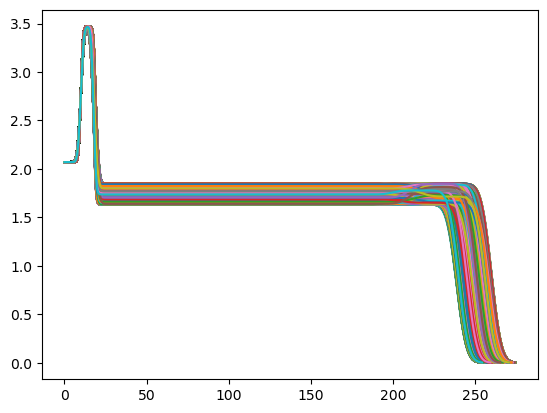

In [13]:
#plot SLD curves
for x in range(curves_nr.shape[0]):
  plt.plot(curves_SLD[x][0],curves_SLD[x][1])
# plt.xscale('log')
# plt.yscale('log')
print(curves_SLD[0])

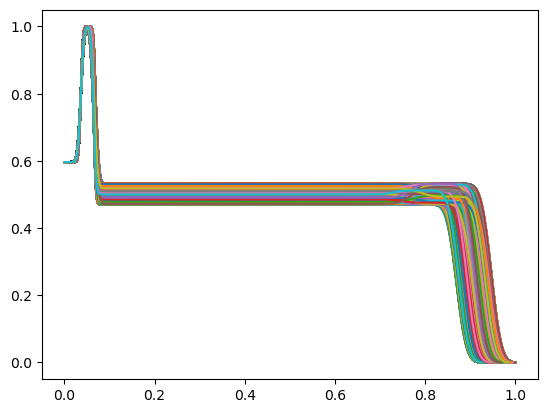

In [14]:
#Normalize SLD curves
from copy import deepcopy
x_points = []
y_points = []
for curve in curves_SLD:
    x_points.append(curve[0].copy())
    y_points.append(curve[1].copy())
min_valX = float('inf')
min_valY = float('inf')
max_valX = -float('inf')
max_valY= -float('inf')
for i in range(len(y_points)):
    min_valX = min(min(x_points[i]), min_valX)
    min_valY = min(min(y_points[i]), min_valY)
    max_valX = max(max(x_points[i]), max_valX)
    max_valY = max(max(y_points[i]), max_valY)
for i in range(len(y_points)):
    for j in range(len(y_points[0])):
        x_points[i][j] -= min_valX
        y_points[i][j] -= min_valY
        x_points[i][j] /= (max_valX - min_valX)
        y_points[i][j] /= (max_valY - min_valY)
curves_SLD2 = []
for i in range(len(y_points)):
    curves_SLD2.append([x_points[i],y_points[i]])
curves_SLD2 = np.stack(curves_SLD2)
curves_SLD2.shape
for x in range(curves_nr.shape[0]):
  plt.plot(curves_SLD2[x][0],curves_SLD2[x][1])

In [15]:
#make CNN

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layers = nn.ModuleList()
        addition = 255/12
        curr = 1
        for hdim in range(12-1):
            self.layers.append(nn.Conv1d(int(curr+0.5), int(curr+addition+0.5),51,padding=25))
            self.layers.append(nn.BatchNorm1d(int(curr+addition+0.5)))
            self.layers.append(nn.ReLU(True))
            curr += addition
        self.layers.append(nn.Conv1d(int(curr+0.5), 256, 51, padding=25))
        self.layers.append(nn.BatchNorm1d(256))
        self.layers.append(nn.ReLU(True))
        
        self.linear1 = nn.Linear(256*308,900*2)
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        x = x.reshape(x.shape[0], -1)
        x = self.linear1(x)
        x = x.reshape(-1, 2, 900)
        return torch.sigmoid(x)

In [16]:
### Define the loss function
loss_fn = torch.nn.MSELoss()
lr= 2.15481e-05
### Set the random seed for reproducible results
torch.manual_seed(0)

#Make CNN
Model = CNN()
params_to_optimize = Model.parameters()

optim = torch.optim.Adam(params_to_optimize, lr=lr, weight_decay= 2.6324e-05)
# Check if the GPU is available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')


Selected device: cuda


In [17]:
Model.to(device)

CNN(
  (layers): ModuleList(
    (0): Conv1d(1, 22, kernel_size=(51,), stride=(1,), padding=(25,))
    (1): BatchNorm1d(22, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv1d(22, 44, kernel_size=(51,), stride=(1,), padding=(25,))
    (4): BatchNorm1d(44, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv1d(44, 65, kernel_size=(51,), stride=(1,), padding=(25,))
    (7): BatchNorm1d(65, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): Conv1d(65, 86, kernel_size=(51,), stride=(1,), padding=(25,))
    (10): BatchNorm1d(86, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): Conv1d(86, 107, kernel_size=(51,), stride=(1,), padding=(25,))
    (13): BatchNorm1d(107, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU(inplace=True)
    (15): Conv1d(107, 129

In [18]:
#splitting data

batch_size=32
R = curves_nr[:,1]

R_m = R[:,np.newaxis,:]
# Q = curves_SLD[:,1]
# Q_m = Q[:, np.newaxis,:]
xtrain, ytrain, xval, yval, xtest, ytest = \
dpre.split_input_arrays(R_m,curves_SLD2, size_split=0.9)
#Prepare data files, continuation
train_dataset, valid_dataset, test_dataset, train_loader, valid_loader, test_loader = \
dpre.get_dataloaders_fromsplitarrays(xtrain,ytrain,xval,yval,xtest,ytest,batch_size=batch_size)
R_m.shape

xtrain.shape, ytrain.shape, xval.shape, yval.shape, xtest.shape, ytest.shape
(90000, 1, 308) (90000, 2, 900) (5000, 1, 308) (5000, 2, 900) (5000, 1, 308) (5000, 2, 900)


(100000, 1, 308)

In [19]:
## Training function
def fit(Model, device, dataloader, loss_fn, optim):
    Model.train().to(device)
    train_loss = []
    for data,label in dataloader:
        img = data
        img = img.to(device)
        label = label.to(device)
        decoded_img = Model(img)
        # print(decoded_img.shape)
        # decoded_img = decoded_img.reshape(-1,2, 308)
        loss = loss_fn(decoded_img, label)
        optim.zero_grad()
        loss.backward()
        optim.step()
        train_loss.append(loss.cpu().detach().numpy())
        # print(label, "hello")
    return np.mean(train_loss)

In [20]:
### Valid function
def val(Model, device, dataloader, loss_fn):
    Model.eval().to(device)
    with torch.no_grad(): 
        list_decoded_img = []
        list_img = []
        for  data, label in dataloader:
            img = data
            # img = img.view(img.size(0), -1).to(device) 
            # img = img[:,np.newaxis,:].to(device) 
            img = img.to(device) 
            label = label.to(device)
            decoded_img = Model(img)
            # decoded_img = decoded_img.reshape(-1,2, 308)
            list_decoded_img.append(decoded_img.cpu())
            list_img.append(label.cpu())
        list_decoded_img = torch.cat(list_decoded_img)
        list_img = torch.cat(list_img)
        # print(list_img, list_decoded_img, "vaLLLLL FUNCTION")
#         for i in range(len(list_img)):
            
        val_loss = loss_fn(list_decoded_img, list_img)
    return val_loss.data

In [21]:
#plotting outputs during training

def plot_outputs(Model,dataset,device,n=10):
  plt.figure(figsize=(26,5.5))
  for i in range(n):
    ax = plt.subplot(2,n,i+1)
    img, label =dataset[i]
    img = img[:,np.newaxis,:].to(device) 
    Model.eval().to(device)
    with torch.no_grad():
      decoded_img  = Model(img)
    plt.plot(label[0], label[1]) 
    if i == n//2:
      ax.set_title('Original images')
    ax = plt.subplot(2, n, i + 1 + n)
    plt.plot(decoded_img.cpu()[0][0], decoded_img.cpu()[0][1]) 
    if i == n//2:
      ax.set_title('Reconstructed images')
  plt.show()  

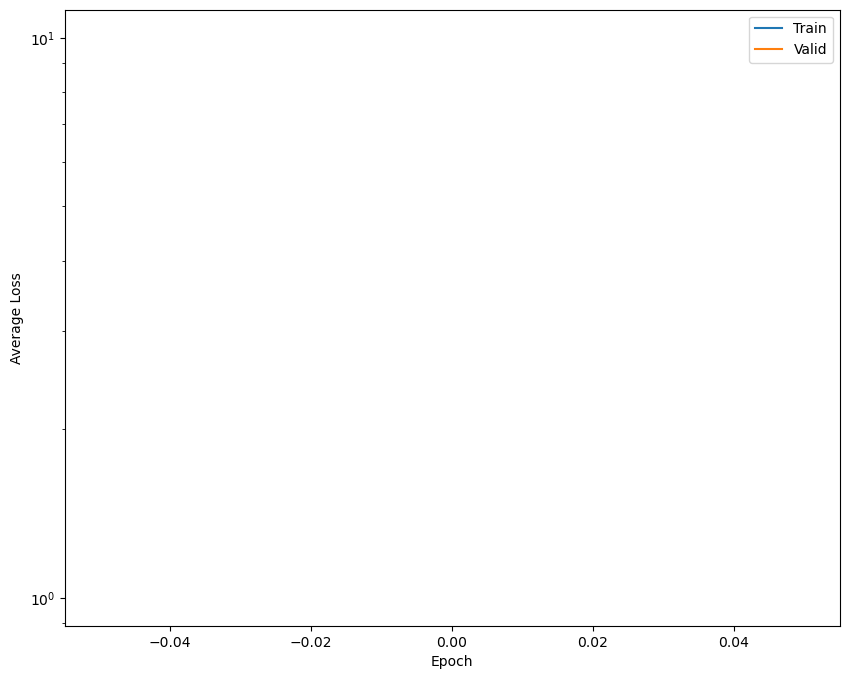

0
6.609853e-05
tensor(4.5681e-05)


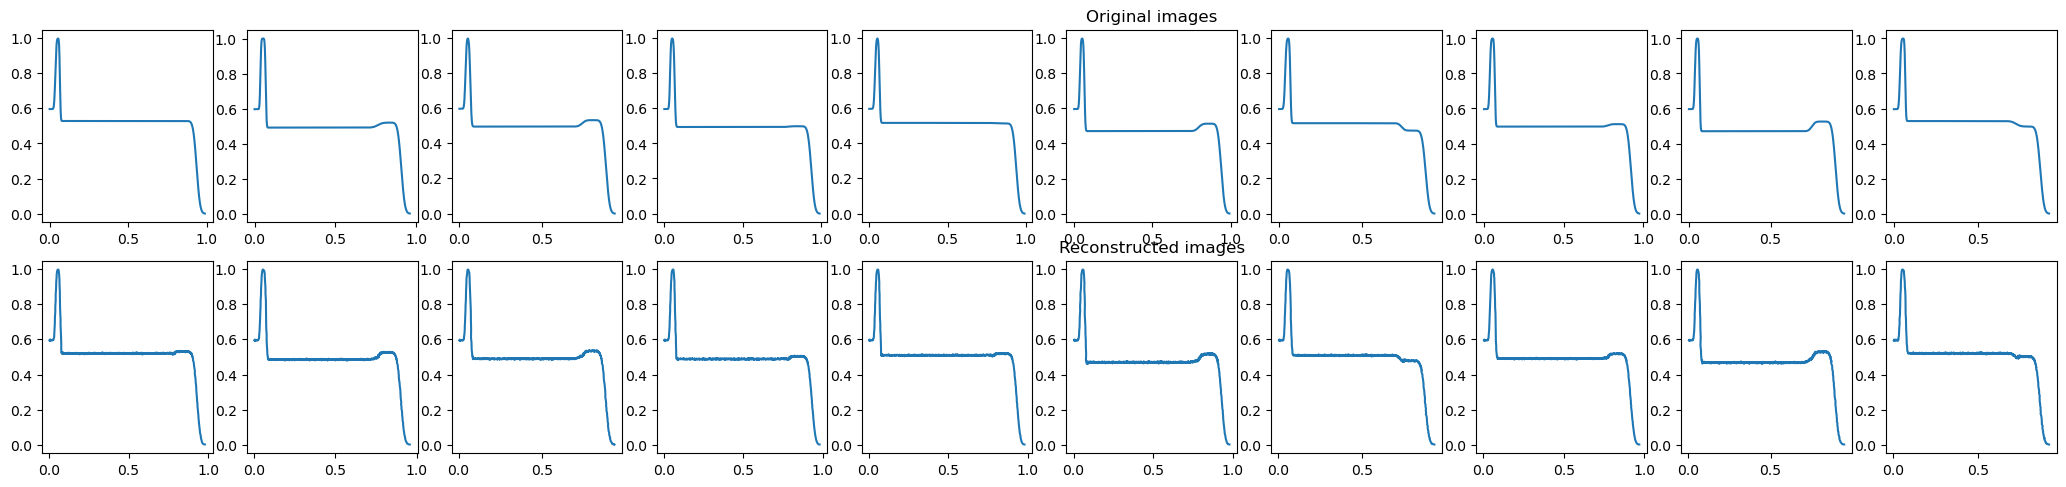

1
1.5952559e-05
tensor(8.1069e-05)


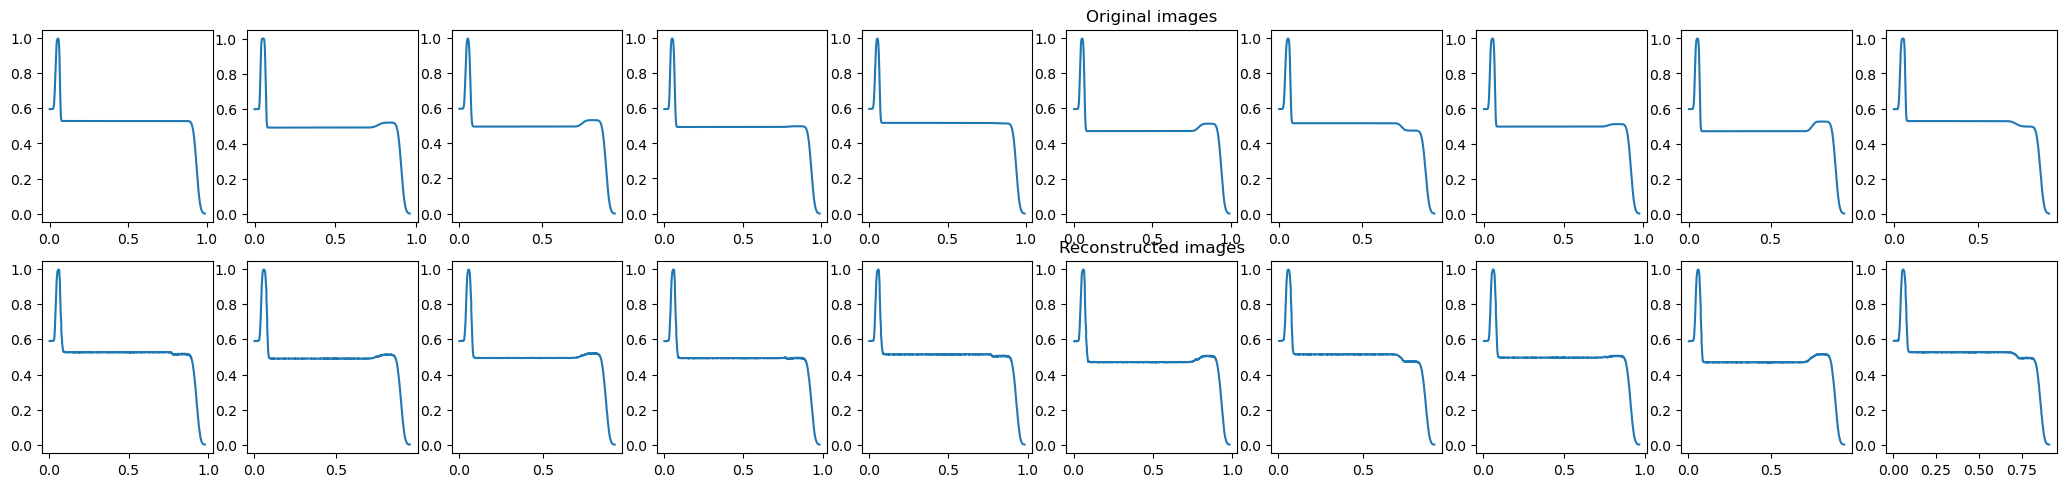

2
0.0008235
tensor(5.3518e-05)


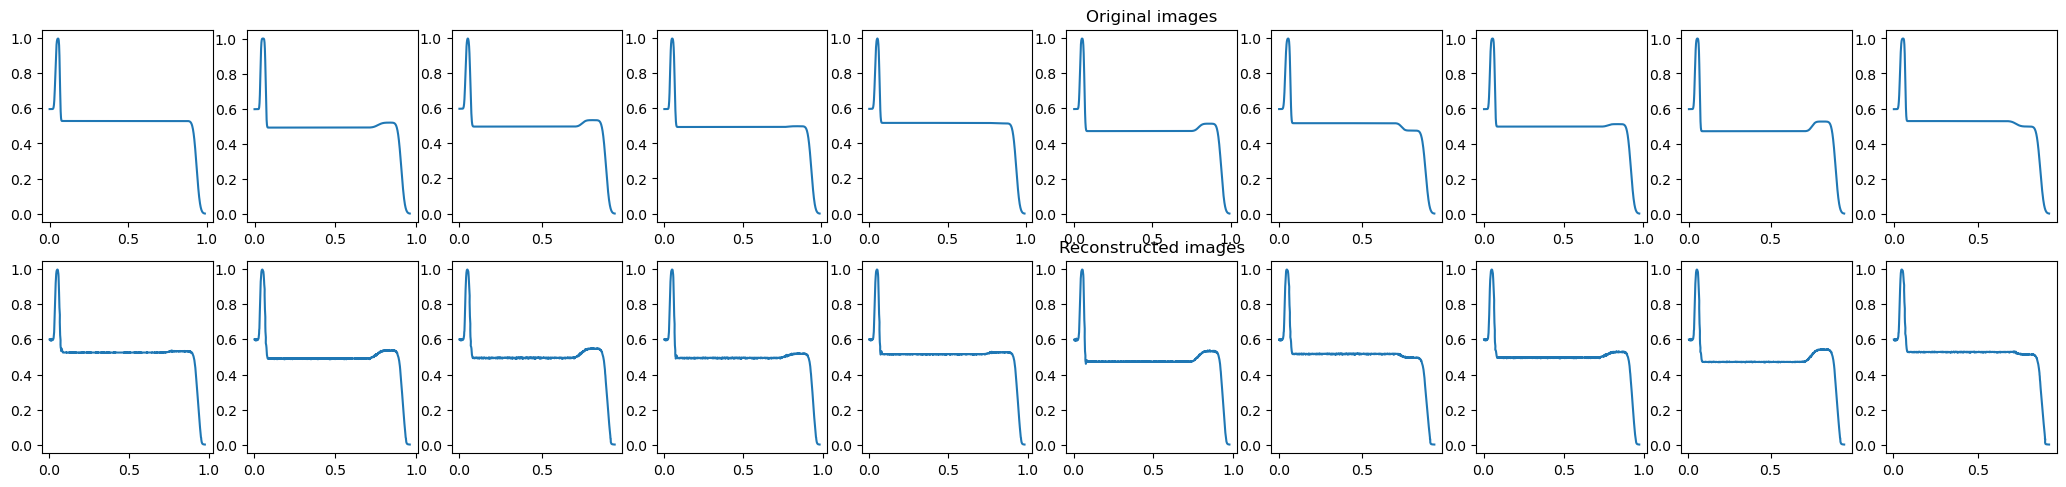

3
4.011552e-05
tensor(4.6258e-05)


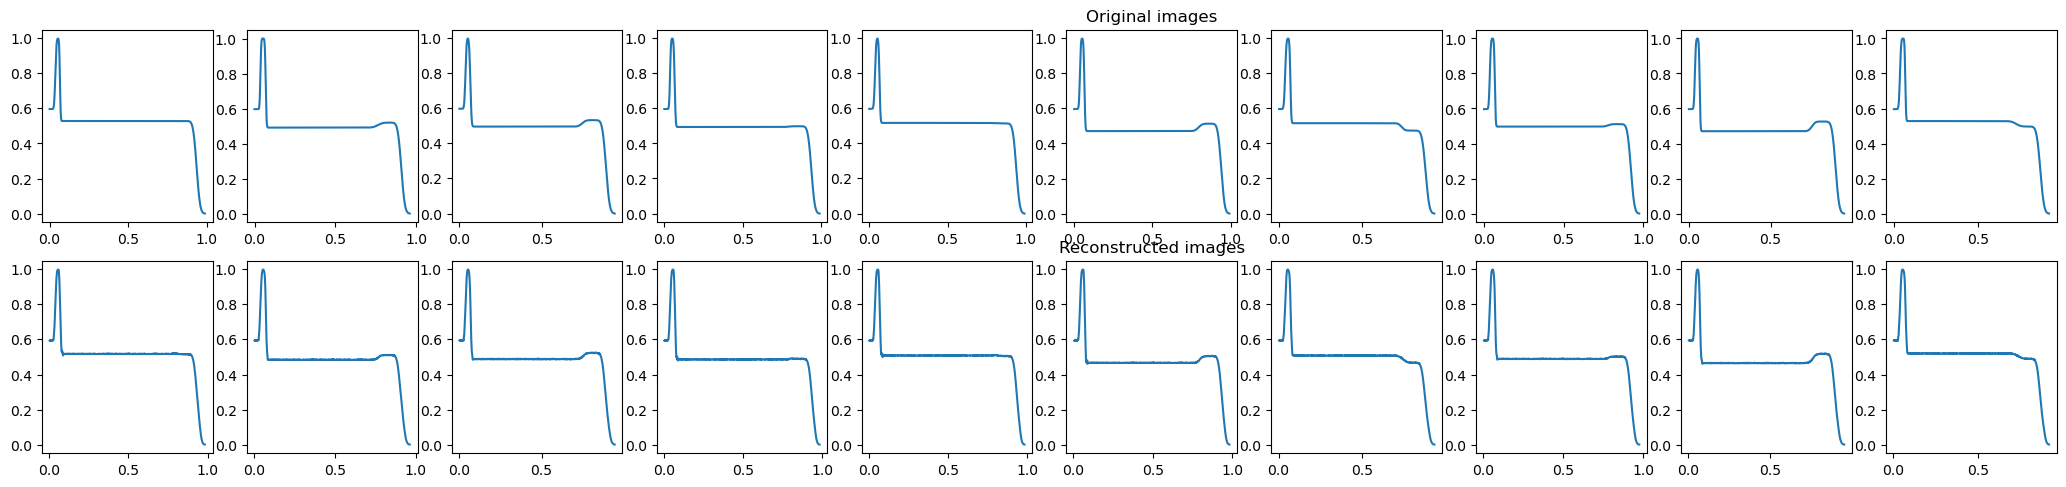

4
2.3496988e-05
tensor(5.9645e-05)


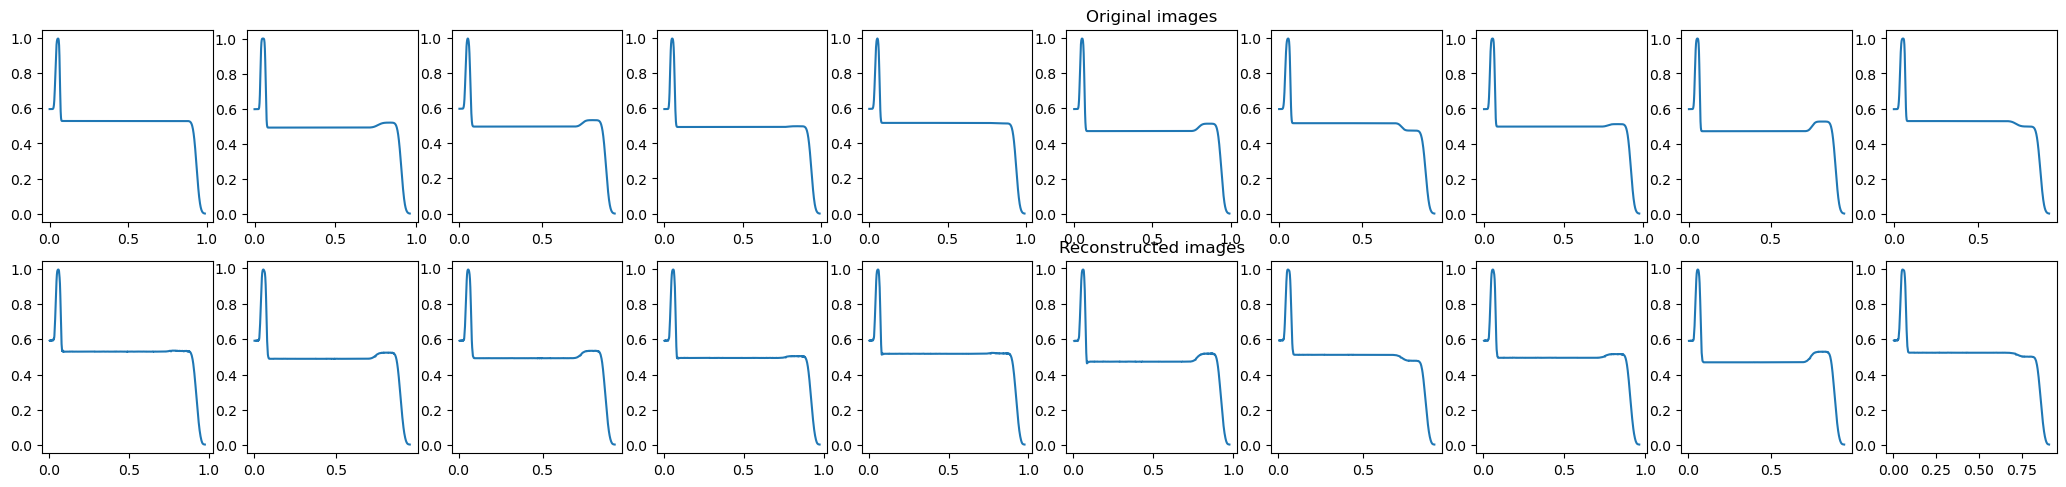

In [23]:
num_epochs=5
#train and validate
diz_loss = {'train_loss':[],'val_loss':[]}
for epoch in range(num_epochs):
  if epoch % 10 ==0:
    # Plot losses
        plt.figure(figsize=(10,8))
        plt.semilogy(diz_loss['train_loss'], label='Train')
        plt.semilogy(diz_loss['val_loss'], label='Valid')
        plt.xlabel('Epoch')
        plt.ylabel('Average Loss')
        plt.legend()
        plt.show()

  print (epoch)
  train_loss = fit(Model,device,train_loader,loss_fn,optim)
  print(train_loss)
  val_loss = val(Model,device,valid_loader,loss_fn)
  print(val_loss)

  diz_loss['train_loss'].append(train_loss)
  diz_loss['val_loss'].append(val_loss)
  plot_outputs(Model,train_dataset,device,n=10)


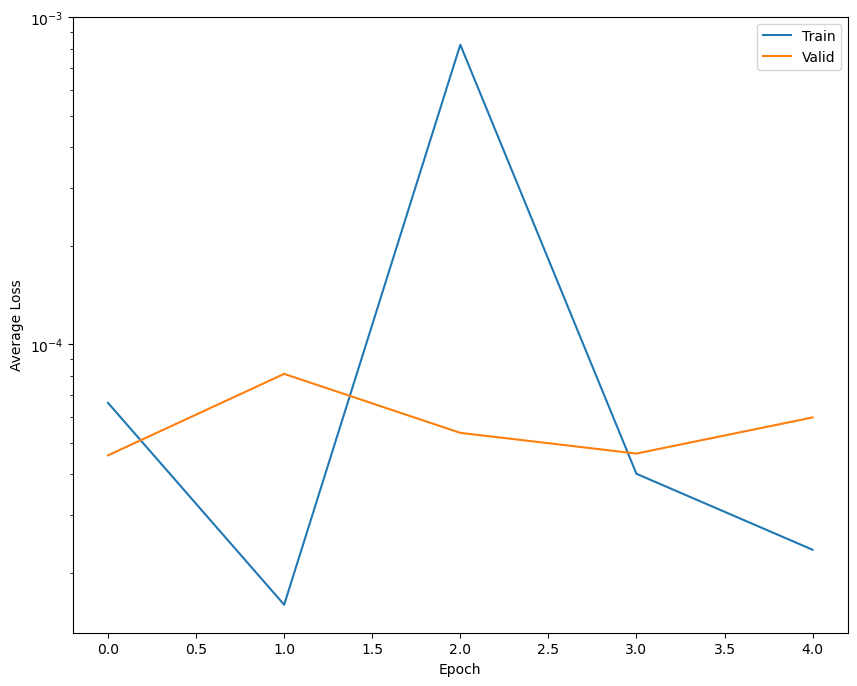

In [24]:

# Plot losses
plt.figure(figsize=(10,8))
plt.semilogy(diz_loss['train_loss'], label='Train')
plt.semilogy(diz_loss['val_loss'], label='Valid')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.legend()




plt.show()


In [25]:
def plot_outputs2(Model,dataset,device,loss_fn, n=10, ):
  plt.figure(figsize=(26,5.5))
  train_loss= []
  for i in range(n):
    ax = plt.subplot(2,n,i+1)
    img, label =dataset[i]
    label = label[:,np.newaxis,:].to(device) 
    img = img[:,np.newaxis,:].to(device) 
    Model.eval().to(device)
    with torch.no_grad():
      decoded_img  = Model(img)
    print(label.shape)
    plt.plot(label.cpu()[0][0], label.cpu()[1][0]) 
    if i == n//2:
      ax.set_title('Original images')
    ax = plt.subplot(2, n, i + 1 + n)
    plt.plot(decoded_img.cpu()[0][0], decoded_img.cpu()[0][1]) 
    if i == n//2:
      ax.set_title('Reconstructed images')
  for i in range(len(dataset)):
    img, label =dataset[i]
    # label = label.to(device)
    label = label[np.newaxis,:,:].to(device) 
    img = img[:,np.newaxis,:].to(device) 
    Model.eval().to(device)
    with torch.no_grad():
      decoded_img  = Model(img)
      loss = loss_fn(decoded_img, label)
      train_loss.append(loss.cpu().detach().numpy())
  print(np.mean(train_loss))
  plt.show()

torch.Size([2, 1, 900])
torch.Size([2, 1, 900])
torch.Size([2, 1, 900])
torch.Size([2, 1, 900])
torch.Size([2, 1, 900])
torch.Size([2, 1, 900])
torch.Size([2, 1, 900])
torch.Size([2, 1, 900])
torch.Size([2, 1, 900])
torch.Size([2, 1, 900])
5.9828442e-05


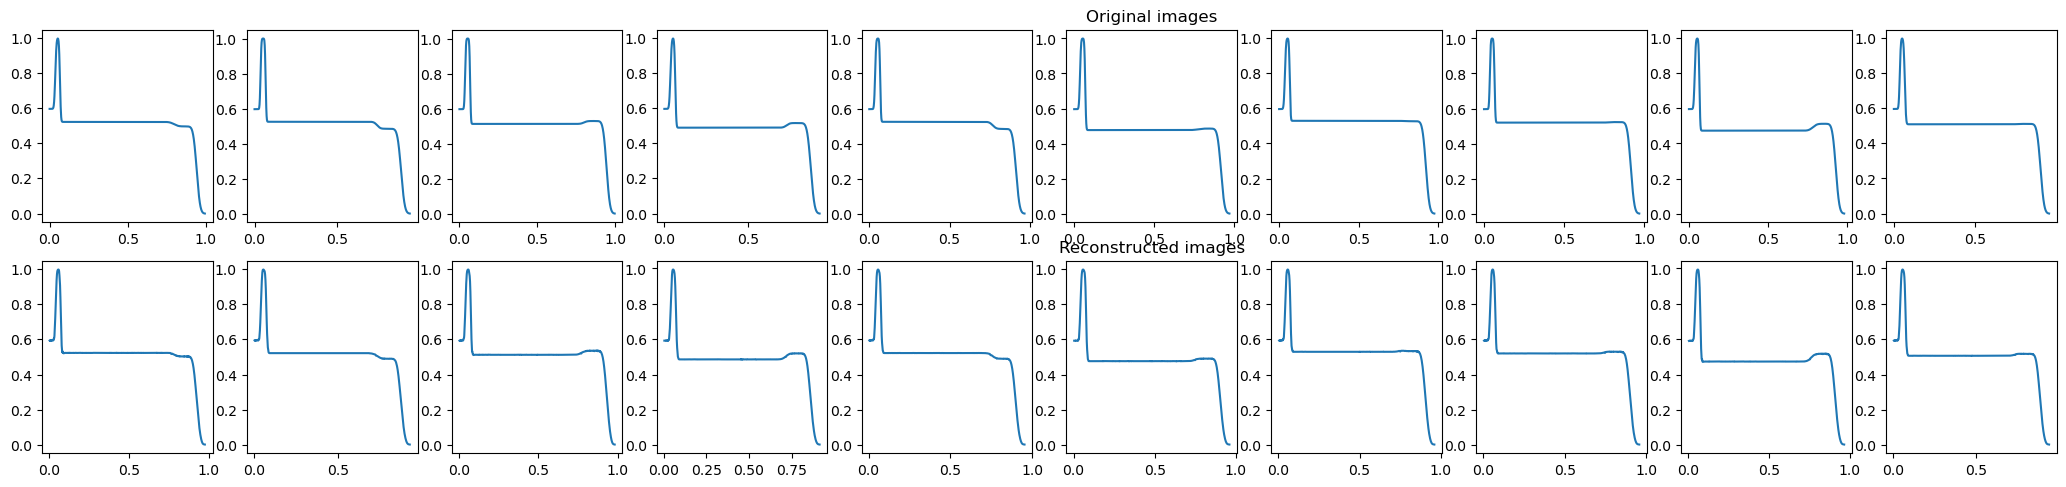

In [26]:
plot_outputs2(Model,test_dataset,device,loss_fn, n=10)
#testing loss and pictures

torch.Size([2, 1, 900])
torch.Size([2, 1, 900])
torch.Size([2, 1, 900])
torch.Size([2, 1, 900])
torch.Size([2, 1, 900])
torch.Size([2, 1, 900])
torch.Size([2, 1, 900])
torch.Size([2, 1, 900])
torch.Size([2, 1, 900])
torch.Size([2, 1, 900])
5.9585953e-05


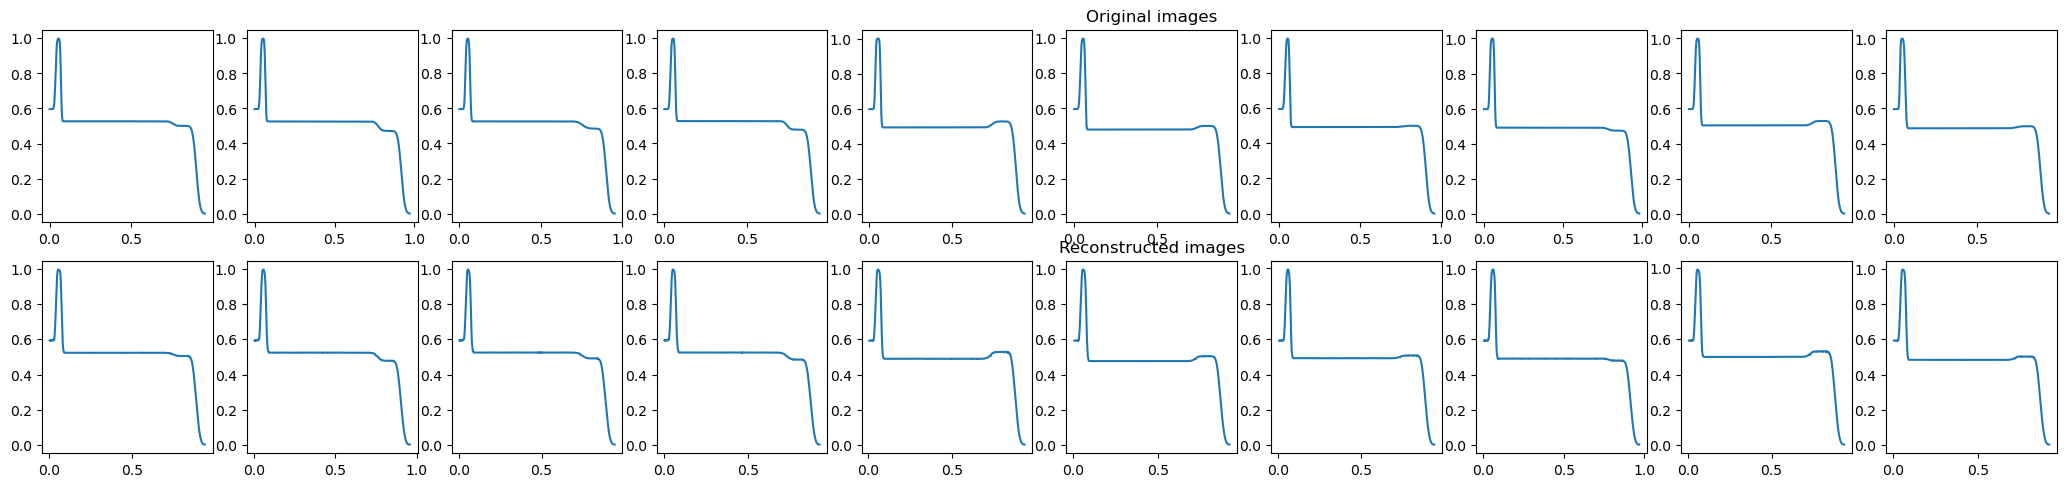

In [27]:
plot_outputs2(Model,valid_dataset,device,loss_fn, n=10)
#validation loss and pictures

In [28]:
print(diz_loss["val_loss"][-1].item())

0.001484683365561068


In [29]:
#downloading experimental data

import gdown
gdown.download_folder("https://drive.google.com/drive/u/0/folders/10zAh8Dqr9c-vSflP35e6KFh54XdYQ-mr")

Retrieving folder list


Processing file 13Q-t2MVk1QKjbHKuaNfd8XJMZyRwdSZD np_out_REFL_202253_combined_data_auto.npy
Processing file 13bYUtviYYUz-DJX5UD54k30qwcWctSZM np_out_REFL_202265_combined_data_auto.npy
Processing file 12duFka2wV6OAownYmuTCsZ5DUzQo4oER np_out_REFL_202272_combined_data_auto.npy
Processing file 12qmDNxKPaeQVXJzgkqCaXaqylgYHPS0r np_out_REFL_202279_combined_data_auto.npy
Processing file 12wg50lq7tyx9jJab56c7vD1iSEGHApVI np_out_REFL_202286_combined_data_auto.npy
Processing file 12gUBY9W4knU-dhVmy0pTBvgOtwHQFQY9 np_out_REFL_202293_combined_data_auto.npy
Processing file 136hrFhuvu7HZTesVx6CqAg13sPwyZAwv np_out_REFL_202300_combined_data_auto.npy
Processing file 12NQ2GN4h-Ek_txO16mkngzDSA4u9Jia2 np_out_REFL_202307_combined_data_auto.npy
Processing file 13AZnvsSmMLIn5WwImrKGnHPs3C5h-UlX np_out_REFL_202314_combined_data_auto.npy
Processing file 13zt4u3qCW37cwgx2njvtplc9l8NQ1Pxk np_out_REFL_202342_combined_data_auto.npy
Processing file 12J0iClc4ybqa35dFUG4lqFP7ur7mahhy np_out_REFL_202349_combined_da

Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=13Q-t2MVk1QKjbHKuaNfd8XJMZyRwdSZD
To: /pscratch/sd/q/qubri000/Neutron_Reflect/npoutputsPoly/np_out_REFL_202253_combined_data_auto.npy
100%|██████████| 5.06k/5.06k [00:00<00:00, 27.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=13bYUtviYYUz-DJX5UD54k30qwcWctSZM
To: /pscratch/sd/q/qubri000/Neutron_Reflect/npoutputsPoly/np_out_REFL_202265_combined_data_auto.npy
100%|██████████| 5.06k/5.06k [00:00<00:00, 19.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=12duFka2wV6OAownYmuTCsZ5DUzQo4oER
To: /pscratch/sd/q/qubri000/Neutron_Reflect/npoutputsPoly/np_out_REFL_202272_combined_data_auto.npy
100%|██████████| 5.06k/5.06k [00:00<00:00, 20.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=12qmDNxKPaeQVXJzgkqCaXaqylgYHPS0r
To: /pscratch/sd/q/qubri000/Neutron_Reflect/npoutputsPoly/np_out_REFL_202279_combined_data_auto.npy
100%|██████████| 5.06k/5.06k [00:00

['/pscratch/sd/q/qubri000/Neutron_Reflect/npoutputsPoly/np_out_REFL_202253_combined_data_auto.npy',
 '/pscratch/sd/q/qubri000/Neutron_Reflect/npoutputsPoly/np_out_REFL_202265_combined_data_auto.npy',
 '/pscratch/sd/q/qubri000/Neutron_Reflect/npoutputsPoly/np_out_REFL_202272_combined_data_auto.npy',
 '/pscratch/sd/q/qubri000/Neutron_Reflect/npoutputsPoly/np_out_REFL_202279_combined_data_auto.npy',
 '/pscratch/sd/q/qubri000/Neutron_Reflect/npoutputsPoly/np_out_REFL_202286_combined_data_auto.npy',
 '/pscratch/sd/q/qubri000/Neutron_Reflect/npoutputsPoly/np_out_REFL_202293_combined_data_auto.npy',
 '/pscratch/sd/q/qubri000/Neutron_Reflect/npoutputsPoly/np_out_REFL_202300_combined_data_auto.npy',
 '/pscratch/sd/q/qubri000/Neutron_Reflect/npoutputsPoly/np_out_REFL_202307_combined_data_auto.npy',
 '/pscratch/sd/q/qubri000/Neutron_Reflect/npoutputsPoly/np_out_REFL_202314_combined_data_auto.npy',
 '/pscratch/sd/q/qubri000/Neutron_Reflect/npoutputsPoly/np_out_REFL_202342_combined_data_auto.npy',


np_out_REFL_202425_combined_data_auto.npy
np_out_REFL_202461_combined_data_auto.npy
np_out_REFL_202349_combined_data_auto.npy
np_out_REFL_202293_combined_data_auto.npy
np_out_REFL_202314_combined_data_auto.npy
np_out_REFL_202394_combined_data_auto.npy
np_out_REFL_202265_combined_data_auto.npy
np_out_REFL_202272_combined_data_auto.npy
np_out_REFL_202279_combined_data_auto.npy
npoutputsPoly/np_out_REFL_202279_combined_data_auto.npy
np_out_REFL_202253_combined_data_auto.npy
np_out_REFL_202342_combined_data_auto.npy
np_out_REFL_202356_combined_data_auto.npy
np_out_REFL_202454_combined_data_auto.npy
np_out_REFL_202468_combined_data_auto.npy
np_out_REFL_202382_combined_data_auto.npy
np_out_REFL_202286_combined_data_auto.npy
np_out_REFL_202406_combined_data_auto.npy
np_out_REFL_202369_combined_data_auto.npy
np_out_REFL_202437_combined_data_auto.npy
np_out_REFL_202307_combined_data_auto.npy
np_out_REFL_202300_combined_data_auto.npy
np_out_REFL_202413_combined_data_auto.npy


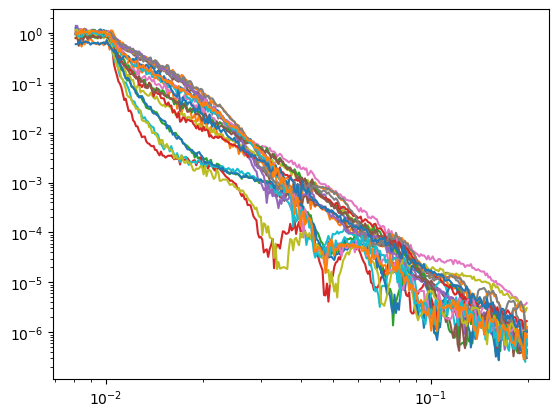

(22, 2, 308)


In [28]:
#plotting experimental data
import os
directory = "npoutputsPoly/"
totalDataPoly = []
parametersPoly = []
count = 0
for i,filename in enumerate(os.listdir(directory)):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        print(f[14:])
    currData = np.load(directory +f[14:])
    xptPoly = []
    yptPoly = []
    parametersPoly.append([])
    # print(f)
    for j in range(10):
        parametersPoly[count].append(int(f[26:32]))
    for j in range(len(currData)):
      xptPoly.append(currData[j][0])
      yptPoly.append(currData[j][1])
    np.array(xptPoly)
    np.array(yptPoly)
    # xpt2 = np.log10(xpt2)
    # ypt2 = np.log10(ypt2)
    totalDataPoly.append([xptPoly,yptPoly])
    # print(xptPoly)
    if i == 8:
      print(f)
    count += 1
totalDataPoly = np.stack(totalDataPoly)
for x in range(len(totalDataPoly)):
  plt.plot(totalDataPoly[x][0],totalDataPoly[x][1])
plt.xscale('log')
plt.yscale('log')
plt.show()
print(totalDataPoly.shape)
totalDataPoly = np.log10(totalDataPoly)

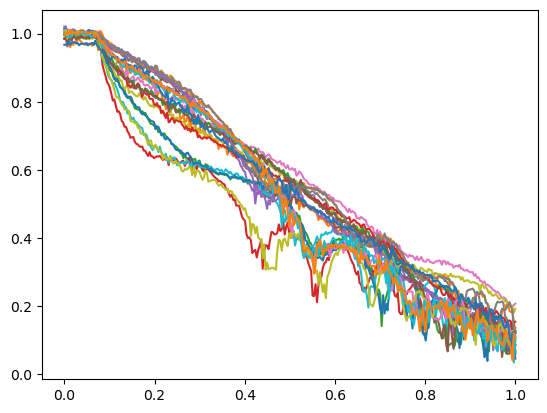

In [29]:
#normalizing experimental data and plotting it again
x_pointsPoly = []
y_pointsPoly = []
for curve in totalDataPoly:
    x_pointsPoly.append(curve[0])
    y_pointsPoly.append(curve[1])
for i in range(len(y_pointsPoly)):
    for j in range(len(y_pointsPoly[0])):
        x_pointsPoly[i][j] -= min_valXNR
        y_pointsPoly[i][j] -= min_valYNR
        x_pointsPoly[i][j] /= (max_valXNR - min_valXNR)
        y_pointsPoly[i][j] /= (max_valYNR - min_valYNR)
totalDataPoly2 = []
for i in range(len(y_pointsPoly)):
    totalDataPoly2.append([x_pointsPoly[i],y_pointsPoly[i]])
totalDataPoly2 = np.stack(totalDataPoly2)
totalDataPoly2.shape
for x in range(totalDataPoly.shape[0]):
  plt.plot(totalDataPoly[x][0],totalDataPoly[x][1])

In [30]:
#splitting experimental data
totalDataPoly.shape
RPoly = totalDataPoly[:,1]
parametersPoly = np.stack(parametersPoly)
batch_size=64
RPoly_m = RPoly[:,np.newaxis,:]
xtrainPoly, ytrainPoly, xvalPoly, yvalPoly, xtestPoly, ytestPoly = \
dpre.split_input_arrays(RPoly_m,parametersPoly, size_split=0.9)
#Prepare data files, continuation
train_datasetPoly, valid_datasetPoly, test_datasetPoly, train_loaderPoly, valid_loaderPoly, test_loaderPoly = \
dpre.get_dataloaders_fromsplitarrays(xtrainPoly,ytrainPoly,xvalPoly,yvalPoly,xtestPoly,ytestPoly,batch_size=batch_size)
print(train_datasetPoly)

xtrain.shape, ytrain.shape, xval.shape, yval.shape, xtest.shape, ytest.shape
(19, 1, 308) (19, 10) (1, 1, 308) (1, 10) (2, 1, 308) (2, 10)


In [31]:
#plots experimental NR curves on top and respective SLD prediction below

def plot_outputs3(Model,dataset,device,loss_fn, n=10, ):
  plt.figure(figsize=(26,5.5))
  train_loss= []
  for i in range(n):
    ax = plt.subplot(2,n,i+1)
    img, label =dataset[i]
    img = img[:,np.newaxis,:].to(device) 
    Model.eval().to(device)
    with torch.no_grad():
      decoded_img  = Model(img)
    print(int(label[0].item()))
    plt.plot(img.cpu().numpy()[0][0])
    if i == n//2:
      ax.set_title('Neutron Reflectivity images')
    ax = plt.subplot(2, n, i + 1 + n)
    plt.plot(decoded_img.cpu()[0][0],decoded_img.cpu()[0][1]) 
    if i == n//2:
      ax.set_title('SLD images')
  plt.show()

202461
202369
202356
202382
202272
202406
202437
202342
202253
202314


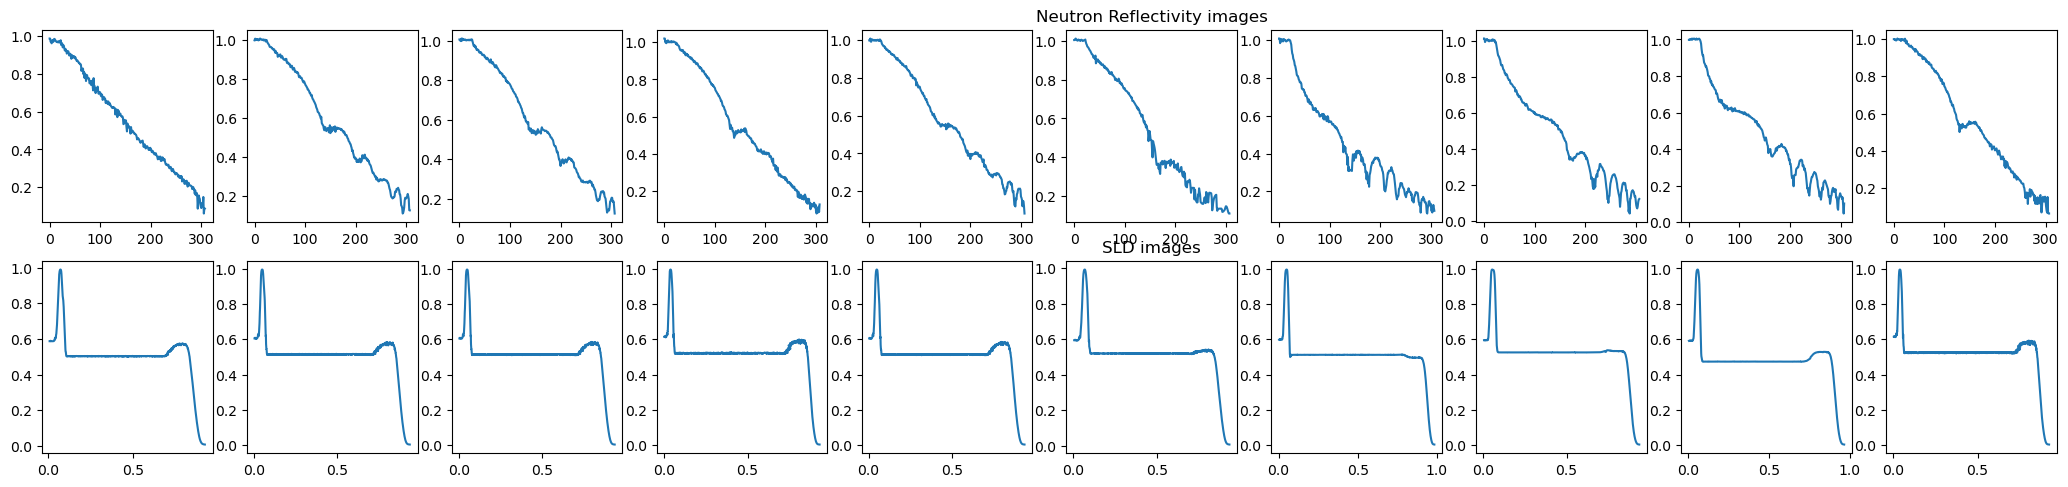

In [32]:
plot_outputs3(Model, train_datasetPoly, device, loss_fn)

In [38]:
pip install refl1d

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: pytorch-lightning 1.6.5 has a non-standard dependency specifier torch>=1.8.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install ipympl

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: pytorch-lightning 1.6.5 has a non-standard dependency specifier torch>=1.8.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [40]:
#this function converts the predicted SLD curve back to NR
import refl1d
from refl1d.names import *

def calculate_reflectivity_from_profile(q, z_step, sld, q_resolution=0.0294855):

    """

        Reflectivity calculation using refl1d from an array of microslabs

    """

    # sld = np.flip(sld)
    zeros = np.zeros(len(q))
    dq = q_resolution * q / 2.355
    # The QProbe object represents the beam

    probe = QProbe(q, dq, data=(zeros, zeros))
    sample = Slab(material=SLD(name='back', rho=sld[0], irho=0), interface=0)
    # Add each layer
    _prev_z = z_step[0]
    for i, _sld in enumerate(sld):
        if i>0:
            thickness = z_step[i] - _prev_z
            sample = sample | Slab(material=SLD(name='l_%d' % i, rho=_sld, irho=0),
                                                thickness=thickness,
                                                interface=0)
        _prev_z = z_step[i]
    probe.background = Parameter(value=0, name='background')
    expt = Experiment(probe=probe, sample=sample)
    a, r = expt.reflectivity()
    return a, r

202300


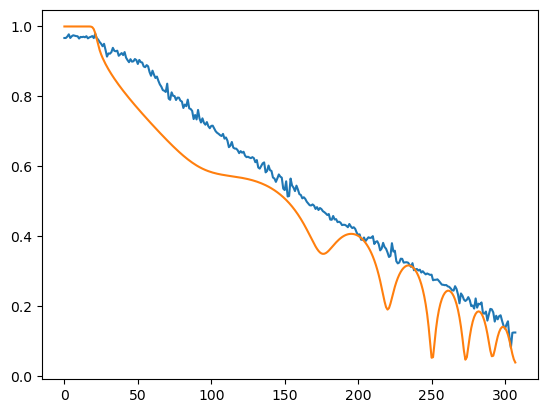

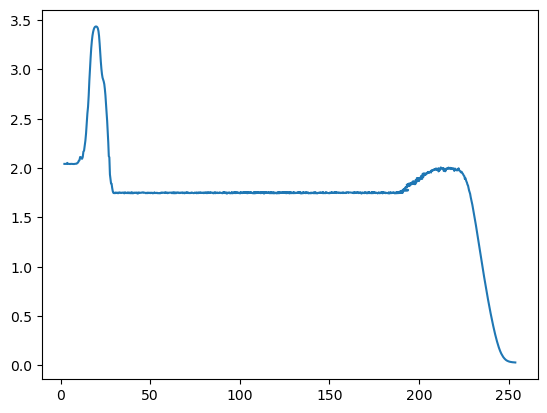

202413


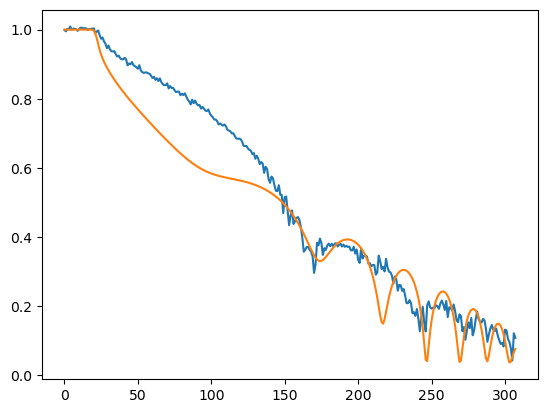

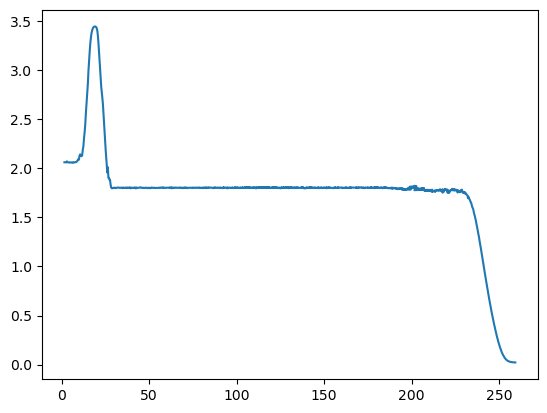

202461


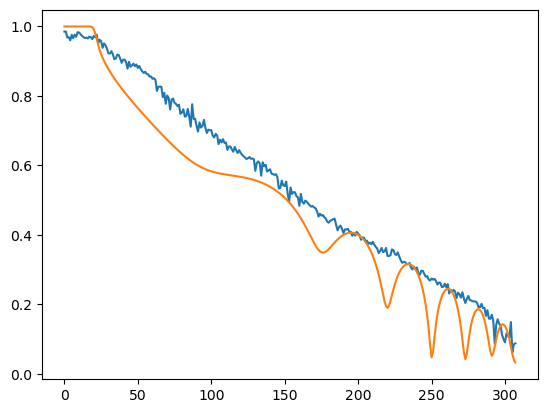

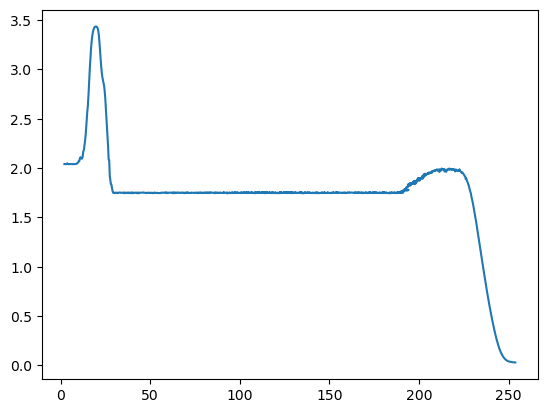

202369


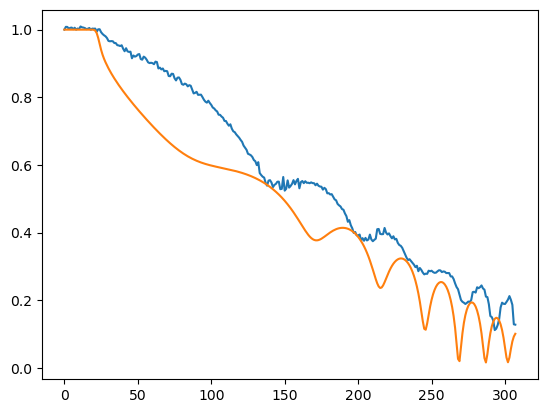

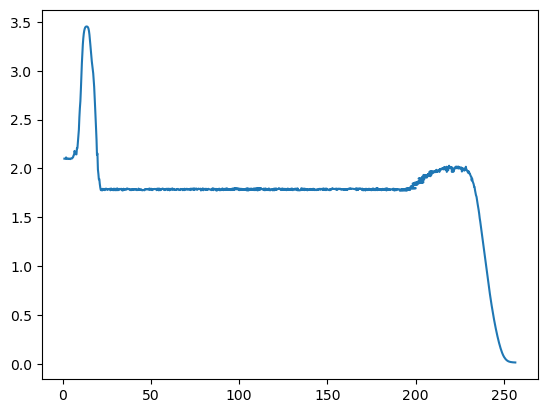

202356


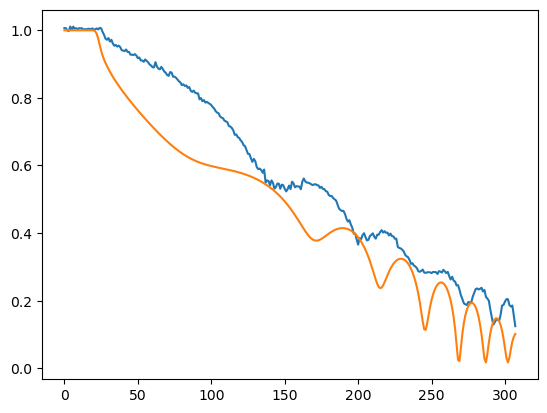

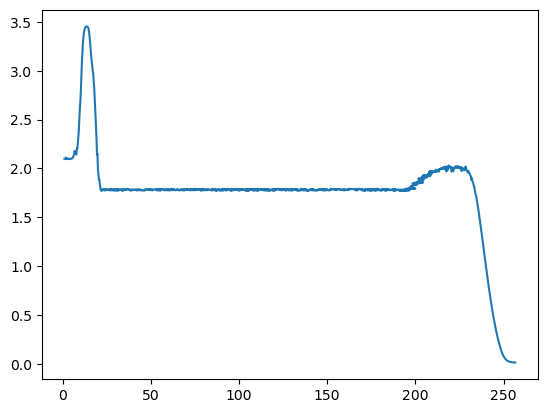

202382


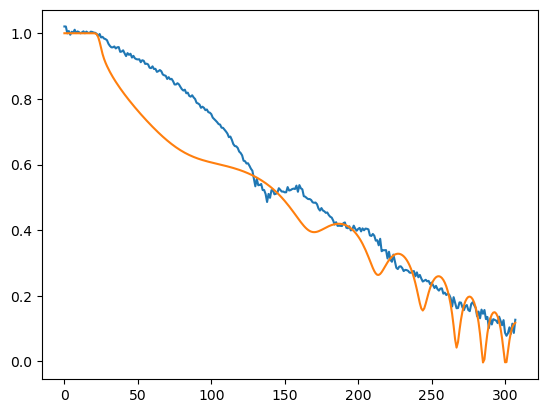

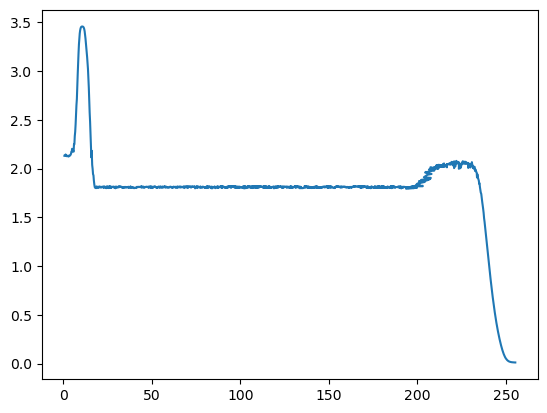

202272


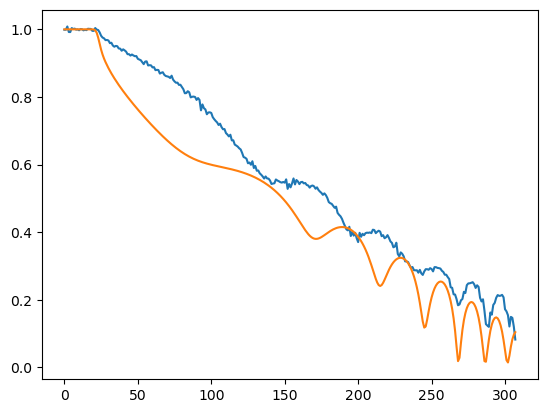

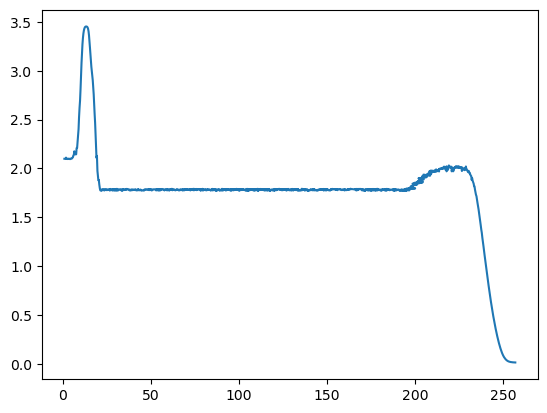

202406


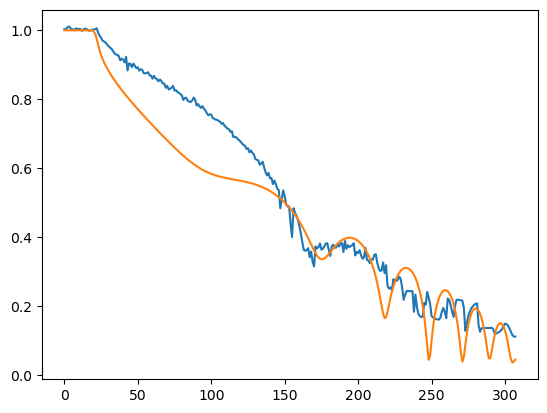

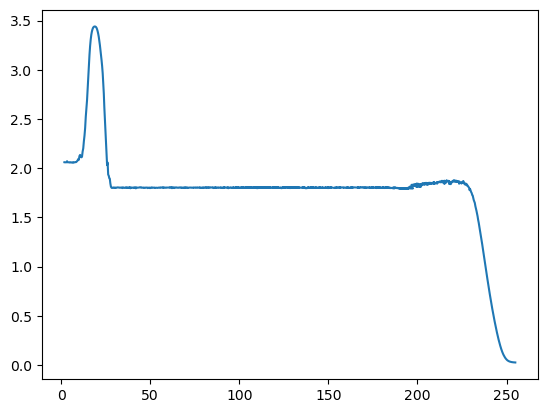

202437


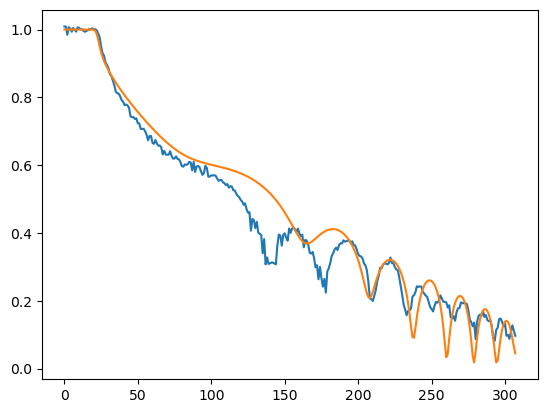

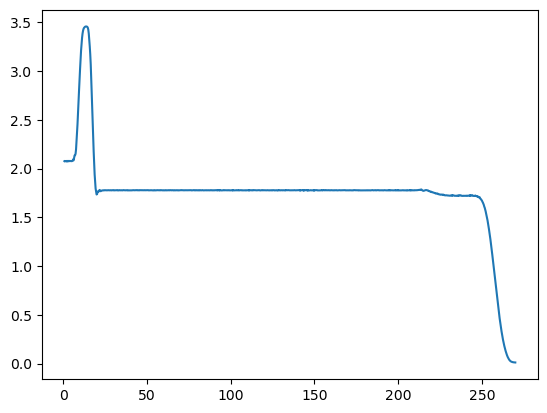

202342


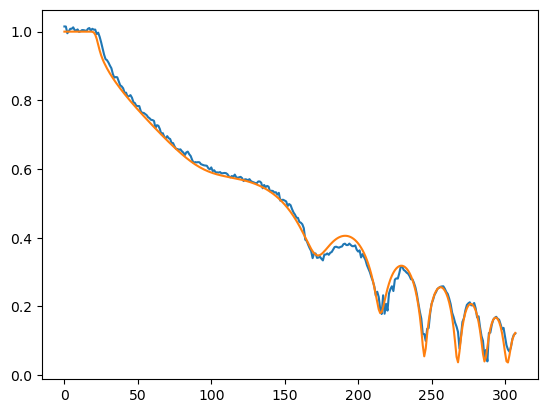

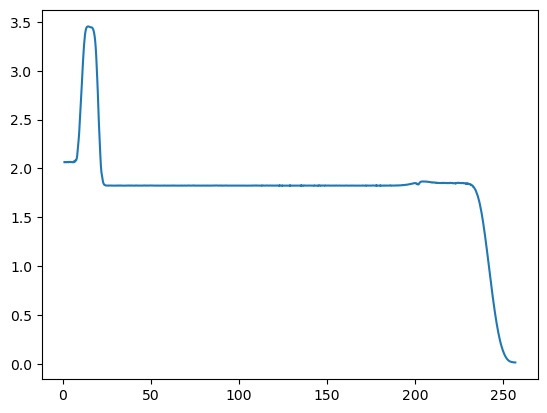

202253


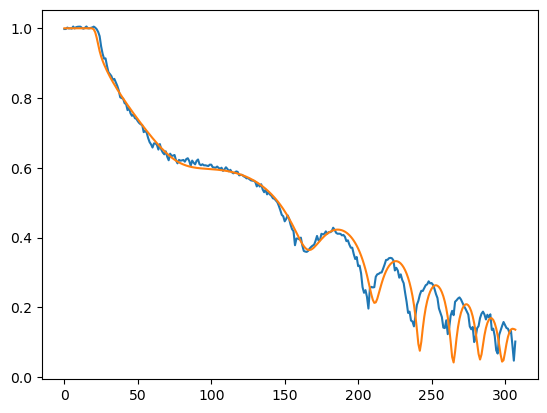

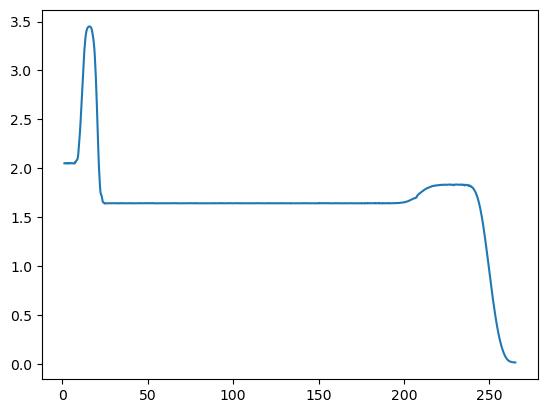

202314


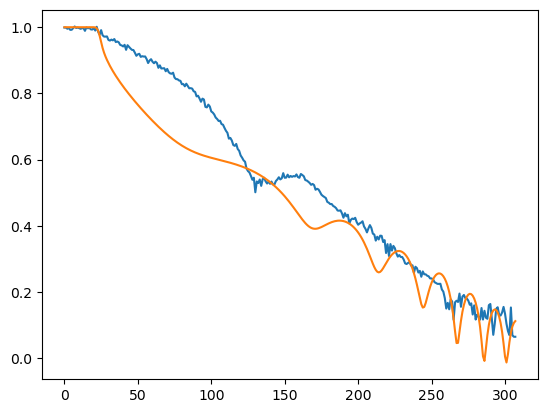

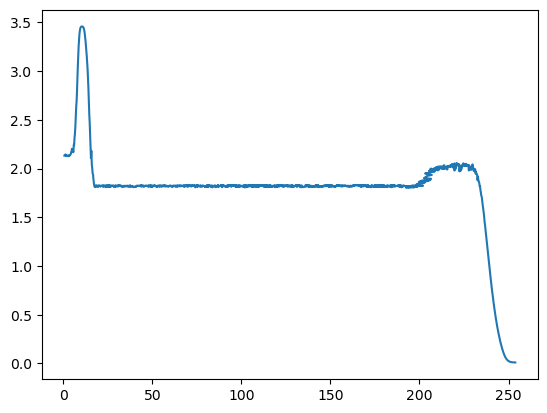

202468


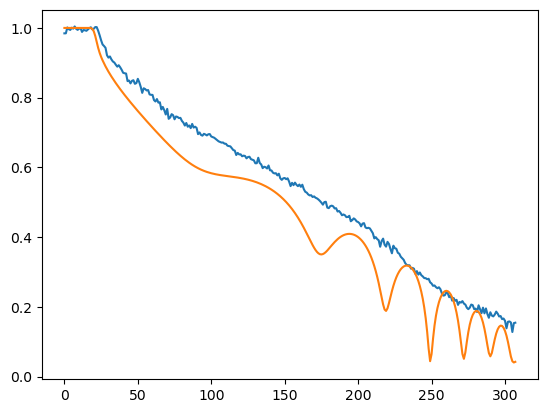

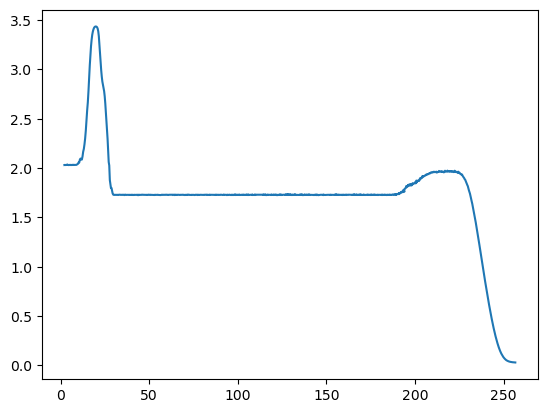

202286


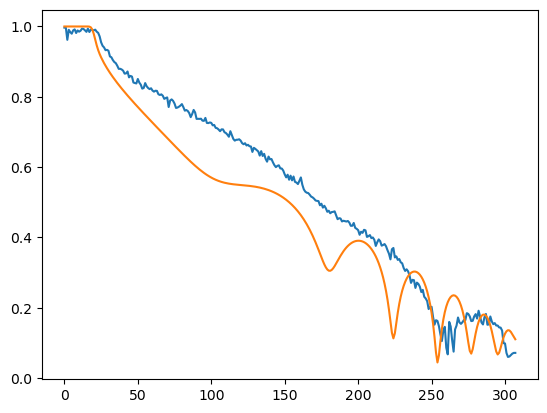

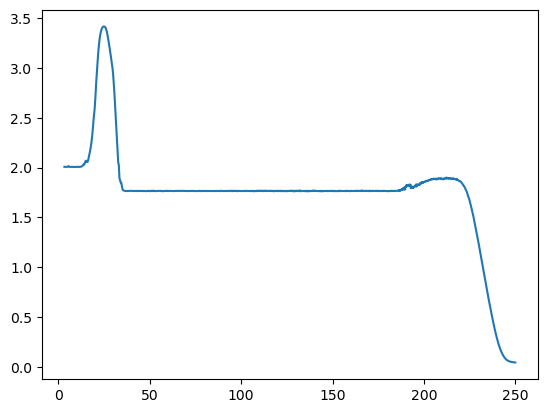

202307


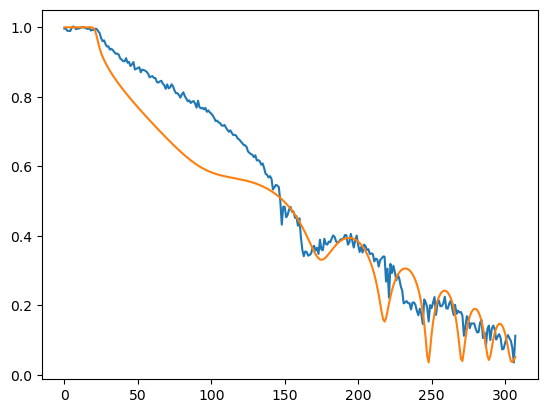

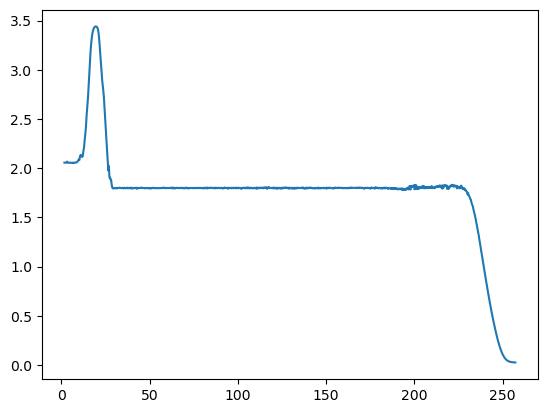

202279


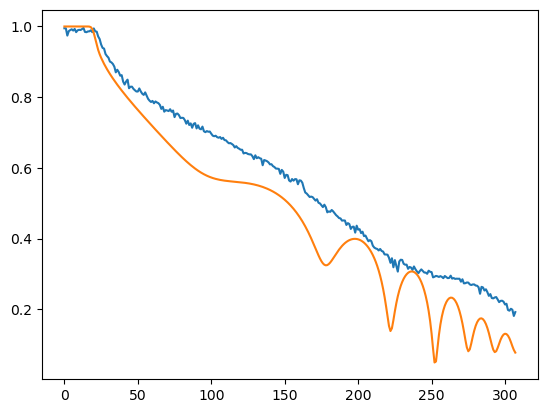

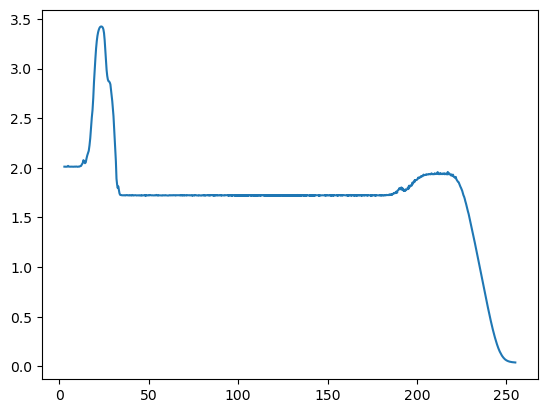

202349


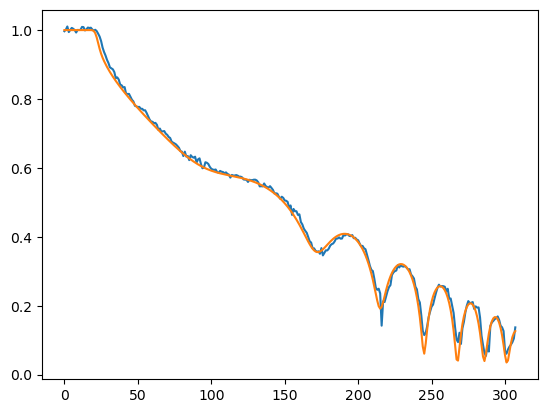

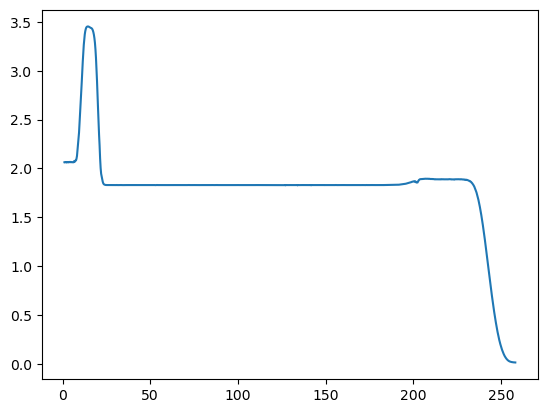

202454


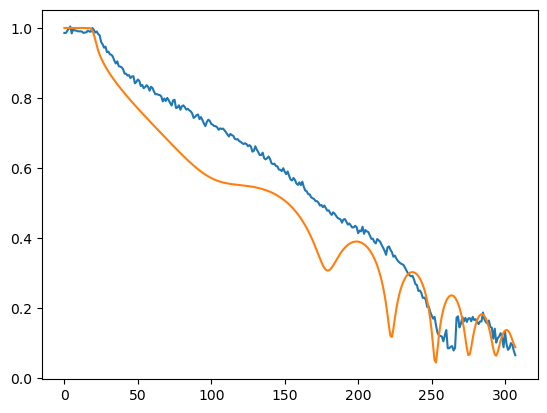

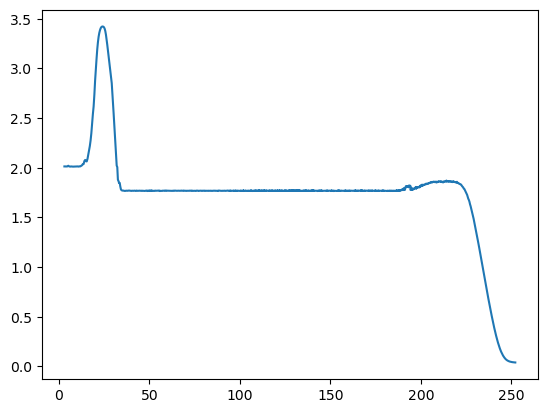

202265


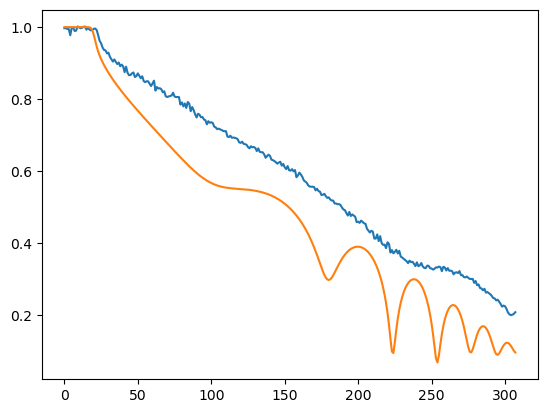

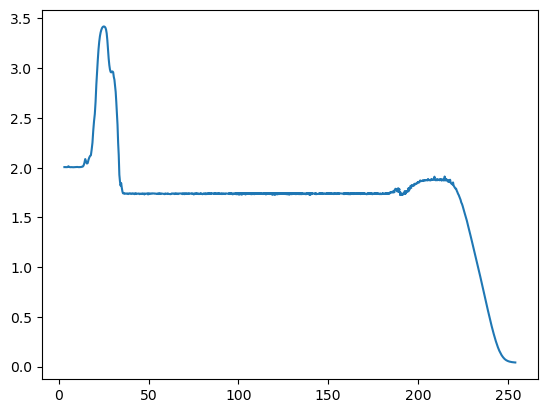

202293


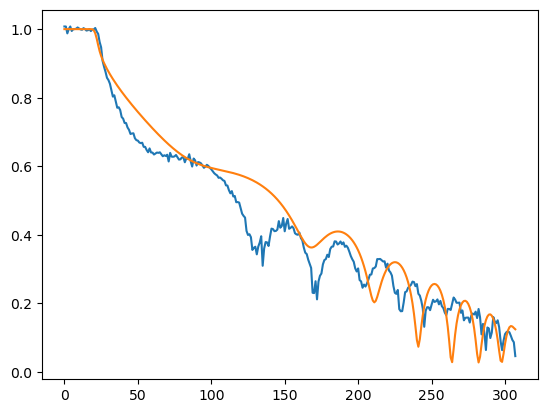

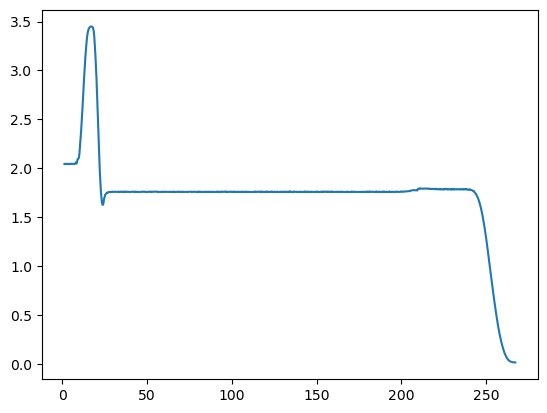

202425


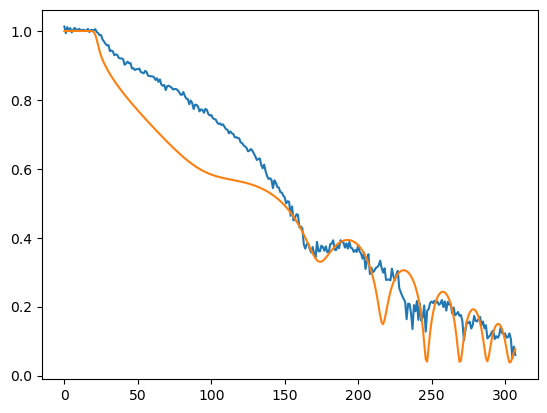

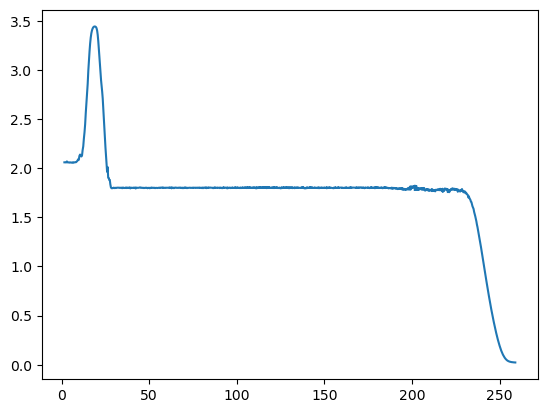

202394


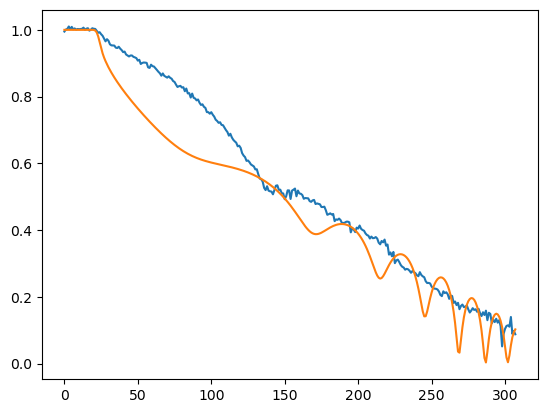

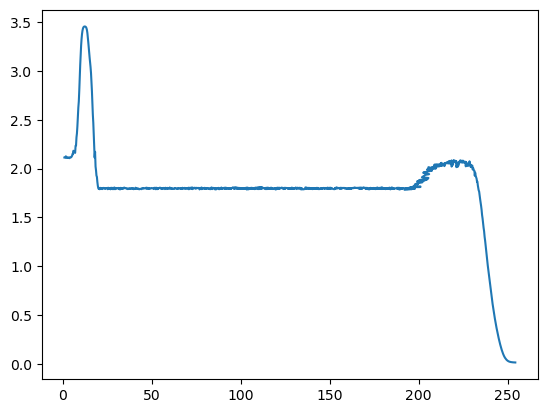

In [45]:
#This plots all NR curves (blue line in first plot), the respective SLD curve (second plot), and the NR curve converted from the SLD curve (orange line in first plot).
#also prints the experimental file number before each plot
for i in range(len(test_datasetPoly)):
    data, label = test_datasetPoly[i]
    data = data[:,np.newaxis,:].to(device)
    Model.eval().to(device)
    with torch.no_grad():
      decoded_img  = Model(data)
    for j in range(len(decoded_img[0][0])):
        decoded_img[0][0][j] *= (max_valX - min_valX)
        decoded_img[0][0][j] += min_valX
        decoded_img[0][1][j] *= (max_valY- min_valY)
        decoded_img[0][1][j] += min_valY

    a, r = calculate_reflectivity_from_profile(np.logspace(np.log10(0.008101436040354381), np.log10(0.1975709062238298), num=308), decoded_img[0][0].cpu().numpy(), decoded_img[0][1].cpu().numpy())
    r = np.log10(r)

    for i in range(len(r)):
        r[i] -= min_valYNR
        r[i] /= (max_valYNR - min_valYNR)

    print(int(label[0].item()))
    plt.plot(data.cpu().numpy()[0][0])
    plt.plot(r)
    plt.show()
    plt.plot(decoded_img.cpu()[0][0],decoded_img.cpu()[0][1])
    plt.show()
for i in range(len(train_datasetPoly)):
    data, label = train_datasetPoly[i]
    data = data[:,np.newaxis,:].to(device)
    Model.eval().to(device)
    with torch.no_grad():
      decoded_img  = Model(data)
    for j in range(len(decoded_img[0][0])):
        decoded_img[0][0][j] *= (max_valX - min_valX)
        decoded_img[0][0][j] += min_valX
        decoded_img[0][1][j] *= (max_valY- min_valY)
        decoded_img[0][1][j] += min_valY
    a, r = calculate_reflectivity_from_profile(np.logspace(np.log10(0.008101436040354381), np.log10(0.1975709062238298), num=308), decoded_img[0][0].cpu().numpy(), decoded_img[0][1].cpu().numpy())
    r = np.log10(r)

    for i in range(len(r)):
        r[i] -= min_valYNR
        r[i] /= (max_valYNR - min_valYNR)
    print(int(label[0].item()))
    plt.plot(data.cpu().numpy()[0][0])
    plt.plot(r)
    plt.show()
    plt.plot(decoded_img.cpu()[0][0],decoded_img.cpu()[0][1])
    plt.show()
for i in range(len(valid_datasetPoly)):
    data, label = valid_datasetPoly[i]
    data = data[:,np.newaxis,:].to(device)
    Model.eval().to(device)
    with torch.no_grad():
      decoded_img  = Model(data)
    for j in range(len(decoded_img[0][0])):
        decoded_img[0][0][j] *= (max_valX - min_valX)
        decoded_img[0][0][j] += min_valX
        decoded_img[0][1][j] *= (max_valY- min_valY)
        decoded_img[0][1][j] += min_valY
    a, r = calculate_reflectivity_from_profile(np.logspace(np.log10(0.008101436040354381), np.log10(0.1975709062238298), num=308), decoded_img[0][0].cpu().numpy(), decoded_img[0][1].cpu().numpy())
    r = np.log10(r)

    for i in range(len(r)):
        r[i] -= min_valYNR
        r[i] /= (max_valYNR - min_valYNR)
    print(int(label[0].item()))
    plt.plot(data.cpu().numpy()[0][0])
    plt.plot(r)
    plt.show()
    plt.plot(decoded_img.cpu()[0][0],decoded_img.cpu()[0][1])
    plt.show()





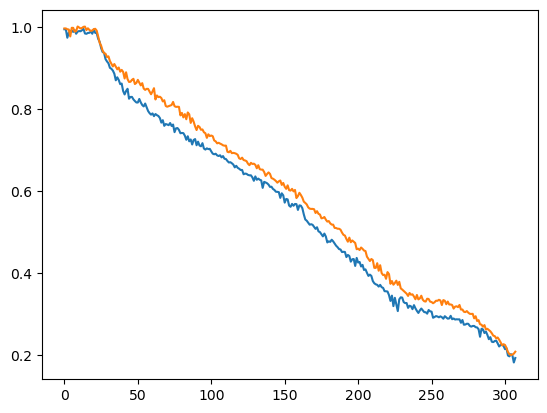

In [42]:
#this is used to plot different curves on top of each other to see their difference
#in this case, experimental numbers 202279 and 202265 are plotted on the same graph to see if they are the same
for i in range(len(train_datasetPoly)):
    data, label = train_datasetPoly[i]
    data = data[:,np.newaxis,:].to(device)
    if label[0] == 202279:
        # plt.show()
        plt.plot(data.cpu().numpy()[0][0])
        file202272 = data.cpu().numpy()[0][0]
        # print('hi')
    if label[0] == 202265:
        # plt.show()
        plt.plot(data.cpu().numpy()[0][0])
        file202356 = data.cpu().numpy()[0][0]
for i in range(len(valid_datasetPoly)):
    data, label = valid_datasetPoly[i]
    data = data[:,np.newaxis,:].to(device)
    if label[0] == 202279:
        # plt.show()
        plt.plot(data.cpu().numpy()[0][0])
        file202272 = data.cpu().numpy()[0][0]
        # print('hi')
    if label[0] == 202265:
        # plt.show()
        plt.plot(data.cpu().numpy()[0][0])
        file202356 = data.cpu().numpy()[0][0]
for i in range(len(test_datasetPoly)):
    data, label = test_datasetPoly[i]
    data = data[:,np.newaxis,:].to(device)
    if label[0] == 202279:
        # plt.show()
        plt.plot(data.cpu().numpy()[0][0])
        file202272 = data.cpu().numpy()[0][0]
        # print('hi')
    if label[0] == 202265:
        # plt.show()
        plt.plot(data.cpu().numpy()[0][0])
        file202356 = data.cpu().numpy()[0][0]

In [44]:
#uncomment this if you want to save the CNN model for later use
#torch.save(Model.state_dict(), "../Polyzwitterion_Fig8/Model_Fig8")